In [1]:
#Installing dependencies  
%pip install opencv-python tensorflow mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2 #To open camera
import numpy as np #To work with array and vectoring
import os 
from matplotlib import pyplot as plt  #Matrices and arrays
import time #Time library to know time for each function
import mediapipe as mp #Googles human vector point tracking library

Keypoints using MP Holistic

In [3]:
mp_holistic =  mp.solutions.holistic# Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False # Image is no longer writeable
    results = model.process(image)# Make prediction
    image.flags.writeable = True # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) #Here what we are doing is giving keypoints in the face a different color so it can be easily distinguished
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) #Same way here for the pose or stature landmark we are putting different colors one for the line joining keypoints other for the keypoints itself
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) # These are giving color and thickness to keypoints and line joining them in the left hand
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) #Same way these are colouring of landmarks in the right hand

In [6]:
cap = cv2.VideoCapture(0)
# Opening the mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Reading feed
        ret, frame = cap.read()

        # finding keypoints
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks on hand and face
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break from the code
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

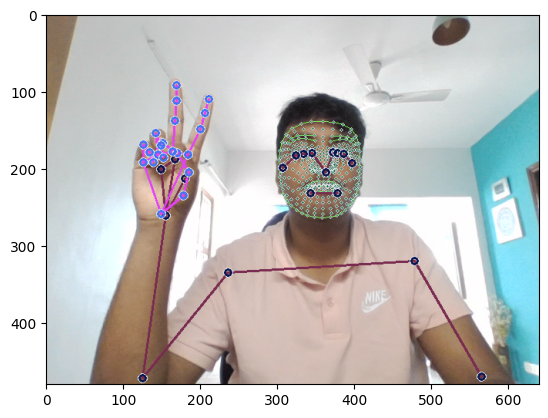

In [9]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Extract keypoint Value

In [7]:
pose = [] #Empty array
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])#Making a collection of all landmark data being collected 
    pose.append(test)#Appending all these data into pose array

In [8]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) #This is a type of command to flatten all the colected data in x,y,z and if no data fill in with zeroes of in matrix in pose
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404) #This is a type of command to flatten all the colected data in x,y,z and if no data fill in with zeroes in matrix in facelandmark
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#This is a type of command to flatten all the colected data in x,y,z and if no data fill in with zeroes in matrix in left hand landmark 21*3 is no of row and column
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3) #Same for right hand

In [9]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4) # landmarks include x, y, z coordinates, and visibility, it flattens the data into a 1D NumPy array with shape (33*4,) and fills 0 if no data
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) #Does the same for face landmarks 
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)# Does the same for left hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#Does the same for right hand
    return np.concatenate([pose, face, lh, rh]) #concatenates all the flattened arrays into a single 1D NumPy array 

In [11]:
result_test = extract_keypoints(results)#Saving 

Folder Collections


In [11]:
DATA_PATH = os.path.join('MP_Data4') # Path of data storage of numpy arrays
#Version 1(action)
#actions = np.array(['hello', 'good','bad','weather','news','general','thank you','how was your day','in bombay','enter'])# Actions we wan to train to detect
#no_sequences = 50 #No of videos
#sequence_length = 35 #Each Videos are 35 frames in length

#Version 2(action3)
#actions = np.array(['good','weather','news','in bombay','in london'])# Actions we wan to train to detect
#no_sequences = 50 #No of videos
#sequence_length = 35 #Each Videos are 35 frames in length

#Version 3(action4)
actions = np.array(['weather','news','in bombay','in london'])# Actions we wan to train to detect
no_sequences = 50 #No of videos
sequence_length = 35 #Each Videos are 35 frames in length

In [40]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collecting Keypoints and start training model

In [63]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:# Setting up mediapipe
    for action in actions:
        for sequence in range(no_sequences): # Loop through sequences
            # Loop through video length
            for frame_num in range(sequence_length):

                # Reading feed
                ret, frame = cap.read()

                # Making mediapipe markings
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), #Lets user know the collecction of data collection is about to start
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)#Font, size and color of data
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) #The {} is used to indicate what video number is being recorded
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA) #If not first frame then just indicate {} is used to indicate what video number is being recorded
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)#Extract kepoints and saving data in keypoints variables
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))#Save the data in .npy format and add it to the given label  
                np.save(npy_path, keypoints)#Sve the landmark coordinates

                # Break from loop
                if cv2.waitKey(10) & 0xFF == ord('q'):#Quit from loop when 'q'
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

Creating labels and processing data

In [12]:
import sklearn

In [13]:
from sklearn.model_selection import train_test_split#This is a model used to differentiate training and testing segments
from tensorflow.keras.utils import to_categorical#Converts class vector to matrix 

In [14]:
label_map = {label:num for num, label in enumerate(actions)}#Numbering each label from 0 to 14
label_map

{'weather': 0, 'news': 1, 'in bombay': 2, 'in london': 3}

In [15]:
sequences, labels = [], []#Making to arrays
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))#Reading data from differrent numpy arrays in data path one by one through {}.npy
            window.append(res)#Appending it to the window empty array for each loop
        sequences.append(window)#Appends the individual window arrays to sequence bigger array
        labels.append(label_map[action])
            

In [16]:
np.array(sequences).shape

(200, 35, 1662)

In [17]:
X = np.array(sequences)#Saving sequence as an array

In [18]:
Y = to_categorical(labels).astype(int)#This makes labels into a binary format for each file


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.05) #Making variable to differentiate XY train and test models and test partition would be 5% of data

Build and Train LSTM model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM #Helps build neural network with specified number of nodes
from tensorflow.keras.callbacks import TensorBoard#Helps trace model when it is training

In [22]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [23]:
model = Sequential()# Calling model that can make layers
model.add(LSTM(64, return_sequences=True, activation = 'relu', input_shape= (35,1662)))#The three LSTM neural layers of 64 units are formed which has 3 keyword arguments and one positional arguments the shape is from the input size OF 30 frames per prediction and 1662 value
model.add(LSTM(128,return_sequences=True, activation= 'relu'))#Return sequence used to return back Lstm LAYER AFTER EACH USE and  more units
model.add(LSTM(64, return_sequences=False, activation='relu'))#return sequence false as no more need for LSTM to come back
model.add(Dense(64,activation = 'relu'))#Adding 3 layers of dense network 
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))#action shape is 15, softmax give value between 0 and 1 and those values to predict the label


In [24]:
## WHY USE LSTM AND MEDIAPIPE (Advantage)
#Most use many CNN layers followed by LSTM layers but this has many disadvantages and requires higher computation
#Requires less data to train the model
#The model trains a lot faster
#Neural network is much simpler and makes detection much faster
#Instead of 30 million paramters it needs only 500k paramters
model.load_weights('action4.h5')

In [25]:
model.compile(optimizer ='Adam', loss = 'categorical_crossentropy', metrics= ['categorical_accuracy'])

In [26]:
model.fit(X_train, Y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
6/6 [==============================] - 6s 132ms/step - loss: 2.6152 - categorical_accuracy: 0.2842
Epoch 2/2000
6/6 [==============================] - 1s 128ms/step - loss: 2.4213 - categorical_accuracy: 0.1947
Epoch 3/2000
6/6 [==============================] - 1s 121ms/step - loss: 1.3985 - categorical_accuracy: 0.3421
Epoch 4/2000
6/6 [==============================] - 1s 121ms/step - loss: 1.2833 - categorical_accuracy: 0.4263
Epoch 5/2000
6/6 [==============================] - 1s 124ms/step - loss: 1.1311 - categorical_accuracy: 0.5105
Epoch 6/2000
6/6 [==============================] - 1s 119ms/step - loss: 0.8545 - categorical_accuracy: 0.6368
Epoch 7/2000
6/6 [==============================] - 1s 128ms/step - loss: 0.7574 - categorical_accuracy: 0.6632
Epoch 8/2000
6/6 [==============================] - 1s 125ms/step - loss: 0.6031 - categorical_accuracy: 0.7421
Epoch 9/2000
6/6 [==============================] - 1s 129ms/step - loss: 0.3999 - categorical_accuracy:

KeyboardInterrupt: 

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 35, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 35, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 596708 

In [26]:
resu = model.predict(X_test)
actions[np.argmax(resu[0])]

1/1 [==============================] - 1s 679ms/step


'weather'

In [28]:
actions[np.argmax(Y_test[0])]

'weather'

Saving Our Made weights

In [82]:
model.save('action4.h5')

c:\Users\Lenovo\Desktop\Sujit's Codes\.venv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evalutaing using Confusion matrix

In [30]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [31]:
Yhat = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [32]:
Ytrue = np.argmax(Y_test,axis =1).tolist()
Yhat = np.argmax(Yhat, axis=1).tolist()

In [33]:
multilabel_confusion_matrix(Ytrue, Yhat)

array([[[7, 0],
        [0, 3]],

       [[7, 0],
        [0, 3]],

       [[9, 0],
        [0, 1]],

       [[7, 0],
        [0, 3]]], dtype=int64)

In [34]:
accuracy_score(Ytrue,Yhat)

1.0

In [35]:
res[np.argmax(res)]

2.7762491703033447

In [37]:
sequence = []#Make an array where labels are detected for 30 frames
sentence = []#Storing history of sequences to form a sentence
def Main_Function():
    sequence = []#Make an array where labels are detected for 30 frames
    sentence1 = []#Storing history of sequences to form a sentence
    threshold = 0.8#Percentage of confidence
    cap = cv2.VideoCapture(0)
    # Opening the mediapipe model 
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():

            # Reading feed
            ret, frame = cap.read()

            # finding keypoints
            image, results = mediapipe_detection(frame, holistic)
            print(results)
            
            # Draw landmarks on hand and face
            draw_styled_landmarks(image, results)
            
            #Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]
            
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]#Changing Shape in order to fit in input
                print(actions[np.argmax(res)])
            
            #Viz Logic
                if res[np.argmax(res)]> threshold :
                    if len(sentence1) > 0:
                        if actions[np.argmax(res)] != sentence1[-1]:#If word not same as previous word append to sentence\
                            sentence1.append(actions[np.argmax(res)])
                    else:
                        sentence1.append(actions[np.argmax(res)])#Else just append
                            
                if len(sentence1) > 5:
                    sentence1 = sentence1[-3:]
                
            cv2.rectangle(image, (0,0),(640, 40), (245,117, 16), -1)#Make box to display sentence
            cv2.putText(image, ' '.join(sentence1), (3,30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1,(255, 255, 255), 2, cv2.LINE_AA)#Font display
        
            # Show to screen
            cv2.imshow('OpenCV Feed', image)
        

            # Break from the code
            if cv2.waitKey(10) & 0xFF == ord('q'):
                sentence.extend(sentence1)
                break
        cap.release()
        cv2.destroyAllWindows()
    
        
        
Main_Function()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [92]:
sentence

['in bombay', 'news']

In [36]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 [==============================] - 0s 29ms/step


array([[9.8251432e-01, 8.6241205e-05, 1.7285163e-02, 1.1429703e-04]],
      dtype=float32)

In [94]:
cap.release()
cv2.destroyAllWindows()

In [37]:
import spacy

# Download the model
spacy.cli.download("en_core_web_sm")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Chatbot Functions

In [38]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [39]:
#Importing necessary dependencies
import requests
import spacy


In [44]:
def greet_user():
    print("Hello! I'm your weather and news chatbot. How can I assist you today?")

In [42]:
def fetch_weather(city_name, weather_api_key):
    base_url = "http://api.weatherstack.com/current"

    parameters2 = {
        "access_key": weather_api_key,  # Replace with your Weatherstack API key
        "query": city_name  # Provide the city name for which you want weather data
    }

    try:
        # Sending GET request to Weatherstack API
        response = requests.get(base_url, params=parameters2)

        # Checking status code
        if response.status_code == 200:
            data = response.json()

            # Extract relevant weather information from the API response
            temperature = data["current"]["temperature"]
            description = data["current"]["weather_descriptions"][0]

            tts = f"The current temperature in {city_name} is {temperature}°C, and the weather is {description}."
            # Display the weather information to the user
            
            print(tts) 
            
           #tts = print(f"The current temperature in {city_name} is {temperature}°C, and the weather is {description}.")
            
            #with open('txtsaver.txt', 'w') as f:#Saving the text in a word document so that txt-to-speech can read it
                #f.write(tts)
                #f.close()
            # Call the txtospeech function to read out the current article's text
            
            #f = open("txtsaver.txt", "r")
            # Read all the lines of the file
            #data = f.readlines()
            # Close the file
            #f.close()
            # Print the data
            #txtospeech(data)
            
            
        else:
            print("Weather data retrieval failed with status code:", response.status_code)

    except requests.exceptions.RequestException as e:
        print("An error occurred while making the API request:", str(e))


In [43]:
#News fetching http request function
import requests

def getNews():
    api_key = "ec0d64228ef54b10bfdf337c20f6915b"
    url = "https://newsapi.org/v2/top-headlines?country=in&apikey=" + api_key
    response = requests.get(url)

    if response.status_code == 200:
        news = response.json()
        articles = news.get("articles", [])  # Retrieve articles

        for i, article in enumerate(articles[:10], start=1):
            title = article.get("title", "No title available")
            description = article.get("description", "No description available")

            # Construct the text for the current article
            article_text = f"{i}. Title: {title}\nDescription: {description}"
            
            print(article_text)
            
            with open('txtsaver.txt', 'w') as f:#Saving the text in a word document so that txt-to-speech can read it
                f.write(f"{i}. Title: {title}\nDescription: {description}")
            #Call the txtospeech function to read out the current article's text
            
            d = open("txtsaver.txt", "r")
            # Read all the lines of the file
            data = d.readlines()

            # Close the file
            d.close()

            # Print the data
            #txtospeech(data)
            

        print("News articles read out successfully.")
    else:
        print("Failed to fetch news with status code:", response.status_code)



In [46]:
def ask_about_day():
    print("How has your day been going?")
    print("1. Good")
    print("2. Okay")
    print("3. Bad")
    Main_Function()
    response = sentence[-1:].strip().lower()
    return response

In [45]:
def respond_to_day(user_input):
    if user_input == "good":
        print("That's great to hear!")
        tts = "That's great to hear!"
        txtospeech(tts)
    elif user_input == "okay":
        print("I hope it gets better!")
    elif user_input == "bad":
        print("I'm sorry to hear that. Hopefully, things improve soon.")
    else:
        print("I'm not sure I understand. Please choose one of the options.")

In [48]:
def process_user_input(user_input):
    weather_api_key = "030237b834849085a12620022ac393c3"
    news_api_key = "ec0d64228ef54b10bfdf337c20f6915b"
    doc = nlp(user_input)
    tokens = [token.text for token in doc]
    pos_tags = [token.pos_ for token in doc]

    # Check if user input contains the word "weather" or "news"
    if "weather" in tokens:
        city_name = " ".join(tokens[tokens.index("in") + 1:])
        fetch_weather(city_name, weather_api_key)
    elif "news" in tokens:
        getNews()
    elif "hi" in tokens:
        print("Hello!")
    elif "your"and "name" in tokens:
      print("Thank's for asking my name is SLGPT! ")
    else:
        # Handle other user input
        if "how" in tokens and "day" in tokens:
            print("Thanks for asking! mine was good :)")
            day_response = ask_about_day()
            respond_to_day(day_response)
        else:
            print("I'm not sure how to respond to that.")

In [47]:
def main():
    weather_api_key = "030237b834849085a12620022ac393c3"
    news_api_key = "ec0d64228ef54b10bfdf337c20f6915b"

    greet_user()
    #ask_about_day()
    #if cv2.waitKey(10) & 0xFF == ord('s'):
    Main_Function()   
    for x in range(1):
        #user_input = input("You: ").strip().lower()
        input = sentence[-2:]
        user_input  = ' '.join(input)
        user_input=user_input.strip().lower()
        if user_input == "exit":
            print("Goodbye!")
            break
        process_user_input(user_input)

In [52]:
if __name__ == "__main__":
    main()

Hello! I'm your weather and news chatbot. How can I assist you today?
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.

Text-to-Speech model 


In [50]:
%pip install gTTS pyttsx3 playsound soundfile transformers datasets sentencepiece

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import gtts 
from playsound import playsound

In [52]:
def txtospeech(tts):
    ttsx = gtts.gTTS(tts)
    ttsx.save("audio.mp3")
    playsound("audio.mp3")